In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv("train_linear_regression_dataset.csv")
train.RACE=train.RACE.fillna(1)
test=pd.read_csv("test_linear_regression_dataset.csv")
test.RACE=test.RACE.fillna(1)

In [3]:
train_data=train.values
Y=train_data[:,-1].reshape(train_data.shape[0],1)
X=train_data[:,:-1]
test_data = test.values
Y_test = test_data[:,-1].reshape(test_data.shape[0],1)
X_test = test_data[:,:-1] 

In [4]:
X = np.vstack((np.ones((X.shape[0],)),X.T)).T
X_test = np.vstack((np.ones((X_test.shape[0],)),X_test.T)).T

In [70]:
def model(X,Y,learning_rate,iteration):
    m=Y.size
    theta = np.zeros((X.shape[1],1))
    cost_list = []
    for i in range (iteration):
        y_pred=np.dot(X,theta)
        cost = (1/(2*m))*np.sum(np.square(y_pred - Y))
        dtheta = (1/m)*np.dot(X.T,y_pred - Y)
        theta = theta-learning_rate*dtheta
        cost_list.append(cost)
        if(i%(iteration/10) == 0):
            print("Cost is:",cost)
            y_pred = np.dot(X_test, theta)
            er = 1/X_test.shape[0]*np.sqrt(np.sum(np.square(np.abs(y_pred - Y_test))))
            print("Error", er)
            
            
            
    return theta,cost_list

In [71]:
iteration = 100000
learning_rate = 0.0000009
theta,cost_list = model(X,Y,learning_rate = learning_rate, iteration = iteration)

Cost is: 13880452.724928366
Error 224.22746870932932
Cost is: 9709239.729762334
Error 180.71702255016254
Cost is: 8705140.450999243
Error 167.52730361949827
Cost is: 7961420.152001156
Error 157.66707391608733
Cost is: 7397080.331479064
Error 150.13345016173423
Cost is: 6963051.623092851
Error 144.372915980505
Cost is: 6626750.984525107
Error 140.02324974037126
Cost is: 6365064.767009552
Error 136.80838089649592
Cost is: 6160899.132886282
Error 134.49972690462027
Cost is: 6001304.031741339
Error 132.9035826167386


<function matplotlib.pyplot.show(close=None, block=None)>

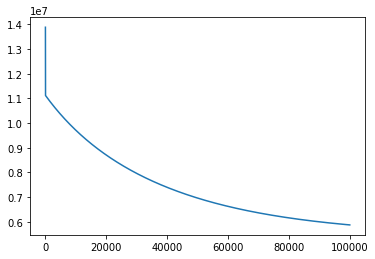

In [72]:
rng = np.arange(0, iteration)
plt.plot(rng,cost_list)
plt.show